## Quote prediction: Model building

There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 4: Model building**

In this notebook, I picked the transformed datasets and the selected variables that I saved in the previous notebooks.



We will evaluate model performance with the:

1. mean absolute error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).

In [48]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# to evaluate the models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

from math import sqrt
from scipy.stats import loguniform


# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [49]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous notebook (feature engineering ).

X_train = pd.read_csv('../data/output/xtrain.csv')
X_test = pd.read_csv('../data/output/xtest.csv')

X_test.head()

,Ins_Gender,bmi,"age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]"
0,1,18.4,0,0,1,0,0
1,1,29.5,0,0,0,1,0
2,0,17.9,0,0,0,1,0
3,1,20.5,0,0,0,1,0
4,1,28.2,0,0,0,1,0


In [50]:
X_train.head()

,Ins_Gender,bmi,"age_bin_(10, 20]","age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]"
0,1,29.0,0,0,1,0,0
1,1,15.9,0,0,1,0,0
2,1,17.3,0,0,0,1,0
3,0,25.8,1,0,0,0,0
4,1,27.3,0,0,0,0,1


In [51]:
y_train = pd.read_csv('../data/output/ytrain.csv')
y_test = pd.read_csv('../data/output/ytest.csv')

y_train.head()

,quote
0,500
1,750
2,1000
3,450
4,500


## Modelling

I have trained 2 models

- Regularized Linear regression(Ridge)
- Random forest

If I had more time, I would have experimented with various models like as SVR, neural nets, and so on.

### Regularised linear regression

## Ridge Regression

In [55]:
# Train the model
lin_model = Ridge(random_state=0,normalize=True)
lin_model.fit(X_train, y_train)

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 


Ridge(normalize=True, random_state=0)

In [56]:
# evaluate the model:

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = lin_model.predict(X_train)
print('linear train mae: {}'.format(mean_absolute_error((y_train), (pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error((y_train), (pred)))))
print('R square Value: {}'.format(r2_score((y_train), (pred))))
print()
pred = lin_model.predict(X_test)
print('linear test mae: {}'.format(mean_absolute_error((y_test), (pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error((y_test),(pred)))))
print('R square Value: {}'.format(r2_score((y_test),(pred))))

linear train mae: 51.27017985314226
linear train rmse: 91.31156731430782
R square Value: 0.32205255876728434

linear test mae: 83.59262002218256
linear test rmse: 145.9895474157783
R square Value: 0.019969183333892082


## Random forest 

Random forest is an ensemble model where we a group of weak learners are combined to form a strong learner. This is one of the mainly used algorithm as it reduces the variance.

In [57]:
# train the model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=0,max_depth = 5)
rf_model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=0)

In [47]:
pred = rf_model.predict(X_train)
print('linear train mae: {}'.format(mean_absolute_error((y_train), (pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error((y_train), (pred)))))
print('R square Value: {}'.format(r2_score((y_train), (pred))))
print()
pred = rf_model.predict(X_test)
print('linear test mae: {}'.format(mean_absolute_error((y_test), (pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error((y_test),(pred)))))
print('R square Value: {}'.format(r2_score((y_test),(pred))))

linear train mae: 4.253571428571429
linear train rmse: 14.820085309181882
R square Value: 0.9821414646187034

linear test mae: 42.939166666666665
linear test rmse: 123.9704552336295
R square Value: 0.29330405447694474


## Feature Importance

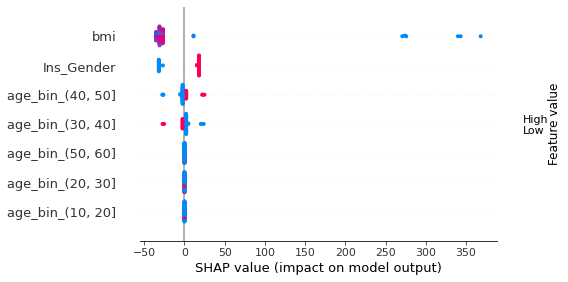

In [58]:
import shap
shap_values = shap.TreeExplainer(rf_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)